# Dataset P.L.

## Steps:

* Build dataset prep P.L.
  * downscale all images to 1080 X 1920 pixels
  * for each image, write an xml body defining each parking spots location for a given view 
    * the view name will be used in defining the location of the spot
  * 
slice the images into parking spots based on regions of interest
label data manually based on y=1 (occ) or y=0 (unocc) or y=1 (event) or y=0 (nonevent)
compute summary stats for each parking spot using them as a feature vector
save data to labelleb folder use later
Method 1: build classifier using summary stats method for each parking spot
prep the dataset:
grayscale the image
flatten each image
compute the summary stats for each image (x,y), storing each summary stat as a input feature
create feature for each summary statistic stored in X (vector) and store Y as {1,2} being the label
repeat for all images
create a csv training set and the pipeline to create it
train the classifier:
start with the simplest approach so start with logisitic regression
split our dataset into test/train
train our classifier and score it using train
evaluate the performance and take discussion from here
Method 1: build classifier using summary stats method for each parking spot


My classes (my actors):
* ParkingMan
  * reads a given XML doc passed via cli and runs the appropriate logic 
  * handles setup of all views for a given run and creates all instances for each class
  * takes care of telling the camera what to do through scheduling and image capturing 
* View
  * field: list of all parking spots in view
  * field: list of all movable fields that will remove all fields 
  holds a def of all parking spots that will 
  * holds the state of each parking spot as a prop 
  * slices each parking spot
  * updates each parking spot 
* ParkingSpot
  * field: parking spot image
  * field: grayscale ps image 
  * field: transformed image (edge detection outputs)
  * field: flattened matrix
  * fields: summary stats
  * fields: occ
  * need methods to update the above 
* camera
  * field: current view of the camera 
* classifier
  * method: predict
  * will need to read in params for some sort of flat file...
  
* DiskPersister: persists the state of each parking spot to disk (could create a RemPersister which streams over remote connection)

### dataprep p.l.:


In [1]:
# imports
import os
import sys

import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import skimage 
from skimage import io, color, exposure

%matplotlib inline

In [10]:
# consts
r_img_dir = '/Users/nikhilarora/data/fydp/sb_images/orig/'


img_path = os.path.join(r_img_dir, 'IMG_9827.JPG')


In [11]:
# util functions:

## cleaning functions

def rev_img(img):
    """reverse img"""
    rev_img = []
    for item in reversed(img):
        rev_cols = []
        for col in reversed(item):
            rev_cols.append(col)
        rev_img.append(rev_cols)
    return np.asarray(rev_img)

def rgb_2_gray(img):
    """converts rgb to grayscale"""
    return np.uint8(color.rgb2gray(img) * 255)

def pre_proc_img(img):
    """Wrapper to store all image cleaning logic"""
    img = rev_img(img)
    img = rgb_2_gray(img)
    return img


In [12]:
# pull images into ndarrays and apply cleaning methods on them

view = pre_proc_img(io.imread(img_path))
# io.imsave('data/cars_cleaned.png',view)

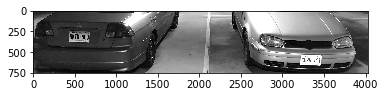

In [24]:
# ispect the images visually:
v_range = (1750,2500)
plt.imshow(view[v_range[0]:v_range[1]], cmap='gray')

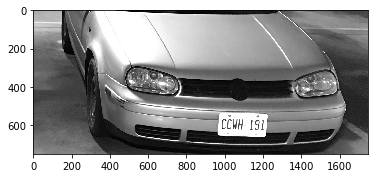

In [25]:
v_slice = view[v_range[0]:v_range[1]]
spots = [(0,2000),(2250, 4000)]
plt.imshow(v_slice[:,spots[1][0]:spots[1][1]], cmap='gray')
# for spot in spots:
#     plt.imshow(v_slice[:,spot[0]:spot[1]], cmap='gray')
